In [ ]:
from __future__ import print_function
from sklearn.gaussian_process.kernels import PairwiseKernel
import keras
#from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, Nadam

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#                         PREPROCESSING DATA

# Change from matrix to array --> dimension 28x28 to array of dimention 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Change to float datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Scale the data to lie between 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices (one hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)



#                       KMEANS to find centers

kmeans_model = KMeans(10)   #find 10 centers with kmeans on training samples
kmeans_model.fit(x_train)
centers = kmeans_model.cluster_centers_
x = kmeans_model.predict(kmeans_model.cluster_centers_)
x = keras.utils.to_categorical(x, 10)


y_trainn= kmeans_model.predict(x_train)
y_trainn=keras.utils.to_categorical(y_trainn,10)
y_testt=kmeans_model.predict(x_test)
y_testt=keras.utils.to_categorical(y_testt, 10)


#                       RBF LAYER

kernel = PairwiseKernel(metric='polynomial')   #GPR uses the kernel to define the covariance of the training sample
rbf_model = GaussianProcessRegressor(kernel=kernel).fit(centers, x)

temp1 = rbf_model.predict(x_train)
temp2 = rbf_model.predict(x_test)


#                      PERCEPTRONS LAYERS
batch_size = 128
epochs = 10

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dropout(0.2))

#model.add(Dense(512, activation='relu', input_shape=(10,)))
#model.add(Dropout(0.2))


model.add(Dense(10, activation='softmax'))

model.summary()
nadam=keras.optimizers.Nadam(lr=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=nadam,
              metrics=['accuracy'])

#                      TRAINING THE MODEL
history = model.fit(temp1, y_trainn,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(temp2, y_testt))

#                      EVALUATE TRAINED MODEL
score = model.evaluate(temp2, y_testt, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               2816      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 5,386
Trainable params: 5,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


469/469 [==============================] - 2s 3ms/step - loss: 0.9081 - accuracy: 0.8561 - val_loss: 0.3501 - val_accuracy: 0.9328
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2752 - accuracy: 0.9403 - val_loss: 0.2077 - val_accuracy: 0.9536
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1880 - accuracy: 0.9536 - val_loss: 0.1586 - val_accuracy: 0.9639
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1527 - accuracy: 0.9581 - val_loss: 0.1336 - val_accuracy: 0.9693
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1303 - accuracy: 0.9625 - val_loss: 0.1167 - val_accuracy: 0.9720
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1177 - accuracy: 0.9644 - val_loss: 0.1057 - val_accuracy: 0.9745
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1074 - accuracy: 0.9656 - val_loss: 0.0962 - val_accuracy: 0.9767
Epoch 8/10
469/46

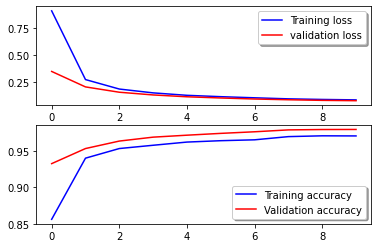

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)